<a href="https://colab.research.google.com/github/Atharva-Gaykar/Deep_Learning/blob/main/notebooks/tabular_data/CROP_RE_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




---

## 🌾 Through this project: Crop Recommendation Based on Soil and Environmental Features

* I built a **multi-class classification model** to recommend the best crop to cultivate based on various **agronomic parameters**.
* The dataset consists of **7 input features**:

  * `N` (Nitrogen content in soil)
  * `P` (Phosphorus content in soil)
  * `K` (Potassium content in soil)
  * `temperature` (in °C)
  * `humidity` (in %)
  * `ph` (soil pH value)
  * `rainfall` (in mm)
* The **target variable** `label` includes **22 different crop types**, such as rice, wheat, maize, etc.
* Preprocessed the dataset by:

  * Checking for **missing values**, **duplicates**, and performing **feature scaling**.
  * Ensured **balanced distribution of classes** to avoid bias.
* Trained various machine learning models including:

 **Artificial Neural Networks (ANN)**.
* Converted categorical crop labels to numerical form using **Label Encoding**.
* Evaluated models using metrics like **accuracy, confusion matrix, and classification report**.
* Learned to visualize model performance using **heatmaps** and **bar charts** to better interpret results.
* Understood the relationship between **soil nutrients and environmental factors** in making accurate crop recommendations.


---

ACTIVATION FUNCTION USED

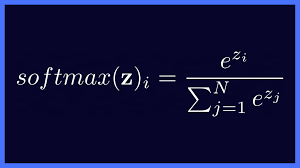

LOSS FUNCTION USED

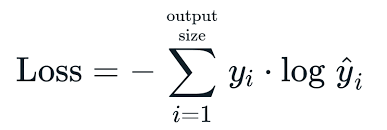

OPTIMIZER USED ADAM

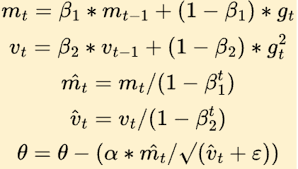

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')
raw_dt=pd.read_csv("/content/drive/MyDrive/Crop_recommendation.csv")
raw_dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
target_labels=len(raw_dt['label'].unique().tolist())
target_labels

22

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
raw_dt['label'] = le.fit_transform(raw_dt['label'])
raw_dt

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=raw_dt["label"], random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1540, 7) (1540,)
Validation set shape: (330, 7) (330,)
Test set shape: (330, 7) (330,)


In [ ]:
X_train_copy=X_train.copy()
X_val_copy=X_val.copy()
X_test_copy=X_test.copy()

<ipython-input-17-a9264e3a01e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='coolwarm')


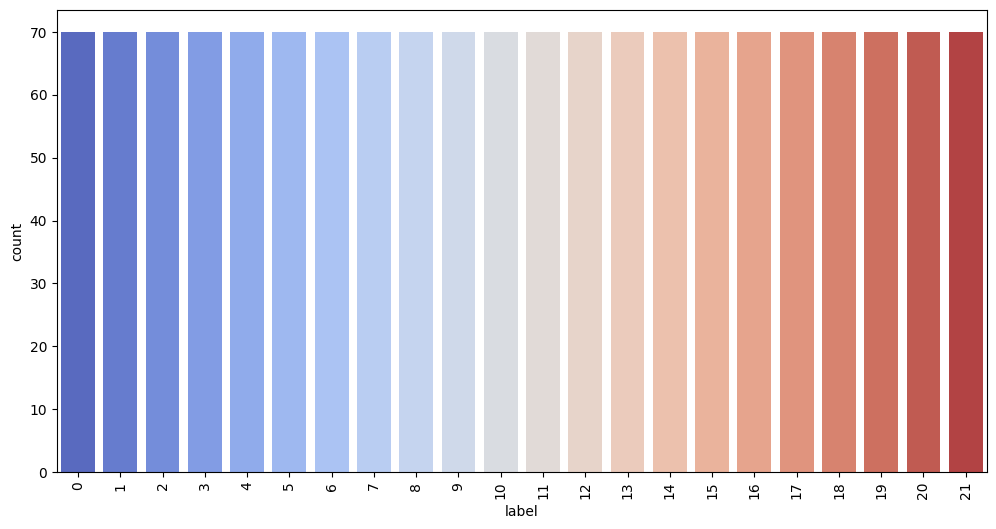

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette='coolwarm')
plt.xticks(rotation=90, fontsize=10)
plt.show()

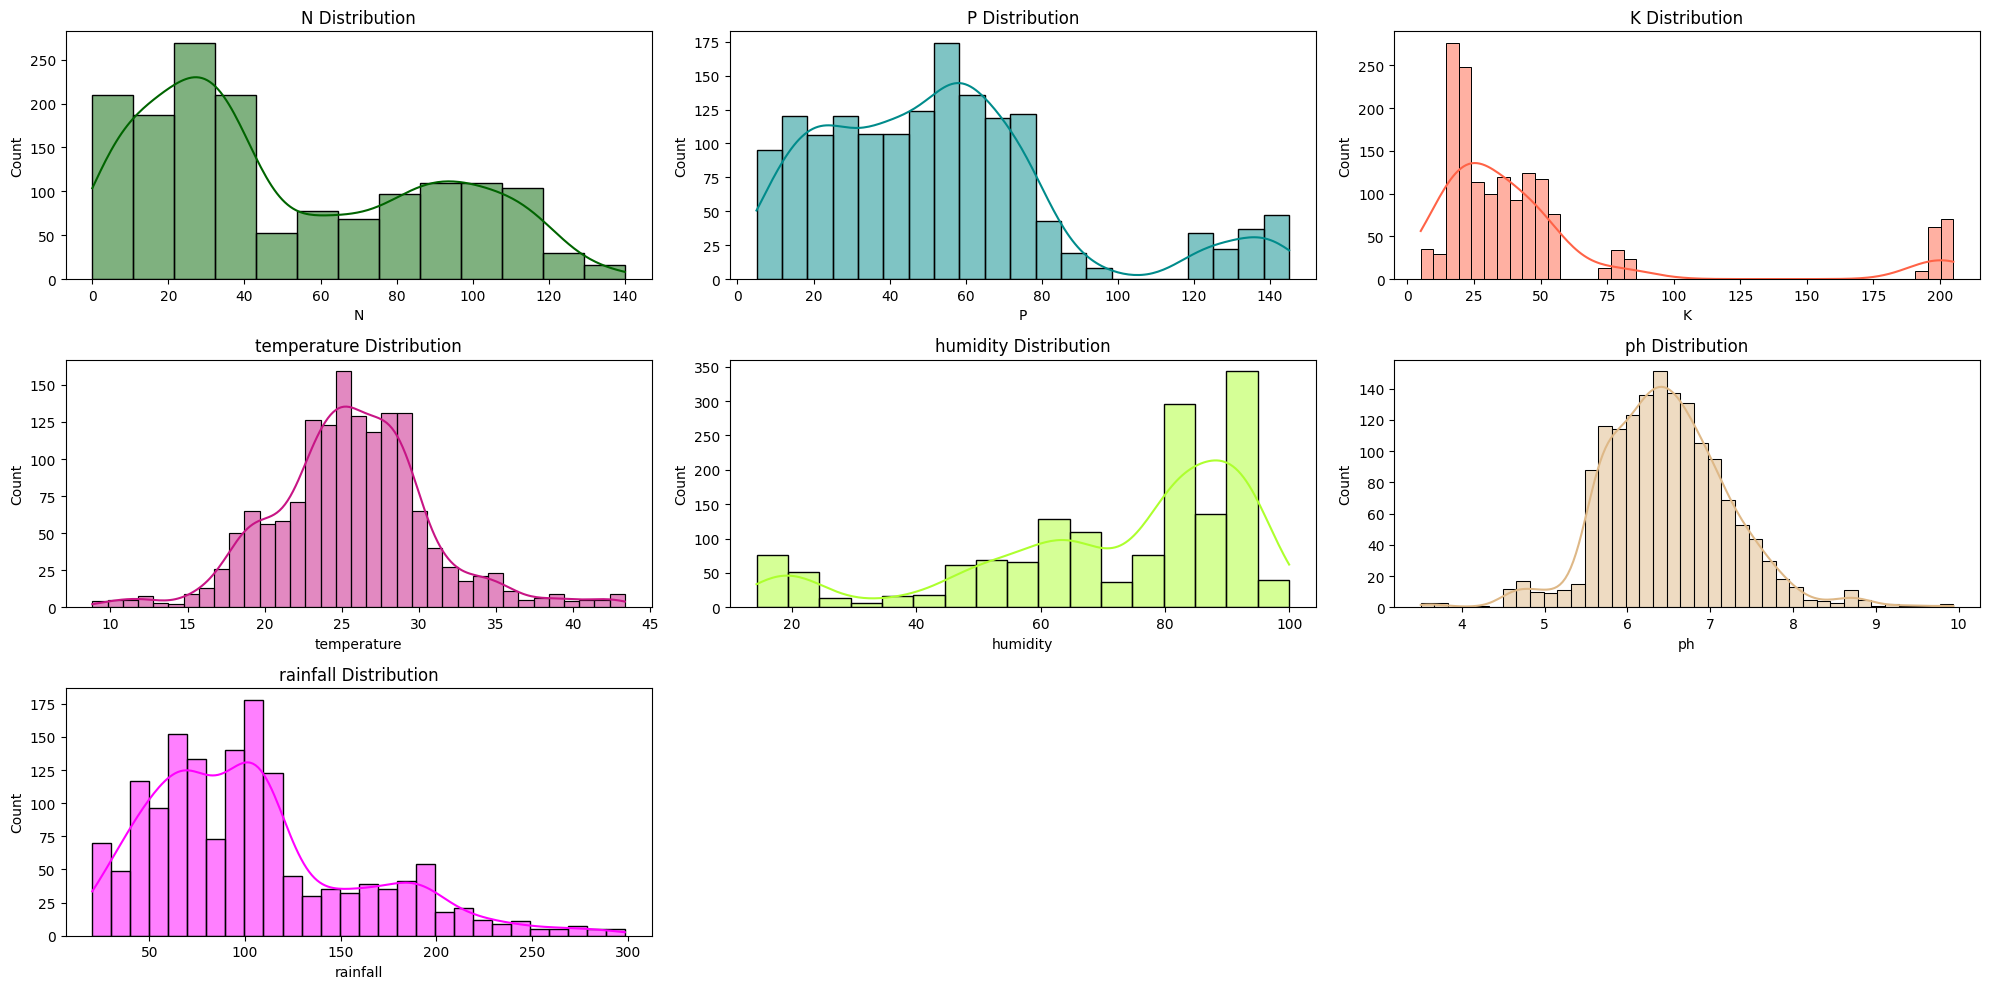

In [ ]:
plt.figure(figsize=(20,10))
colors=['darkgreen','darkcyan','tomato','mediumvioletred','greenyellow','burlywood','fuchsia','navy']
for i,col in enumerate(X_train.columns.tolist()):
    plt.subplot(3,3,i+1)
    sns.histplot(X_train,x=col,kde=True,color=colors[i])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()



---

## 📊 Box Plot & Outlier Detection – Key Formulas

A **box plot** visually represents the **spread and central tendency** of data using **percentiles**. It also helps detect **outliers**.

---

### 🔹 **Key Terms and Formulas:**

#### ✅ **1. Quartiles**

* **Q1 (1st Quartile)**: 25th percentile — value below which 25% of the data lies
* **Q2 (Median)**: 50th percentile — the middle value of the dataset
* **Q3 (3rd Quartile)**: 75th percentile — value below which 75% of the data lies

---

#### ✅ **2. Interquartile Range (IQR)**

$$
\text{IQR} = Q3 - Q1
$$

* Represents the **range of the middle 50%** of the data
* Measures the spread and helps detect how compact or dispersed the data is

---

#### ✅ **3. Outlier Thresholds**

$$
\text{Lower Bound} = Q1 - 1.5 \times \text{IQR}
$$

$$
\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}
$$

* Any data point **less than the lower bound** or **greater than the upper bound** is considered an **outlier**

---





<ipython-input-19-663a9736309a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


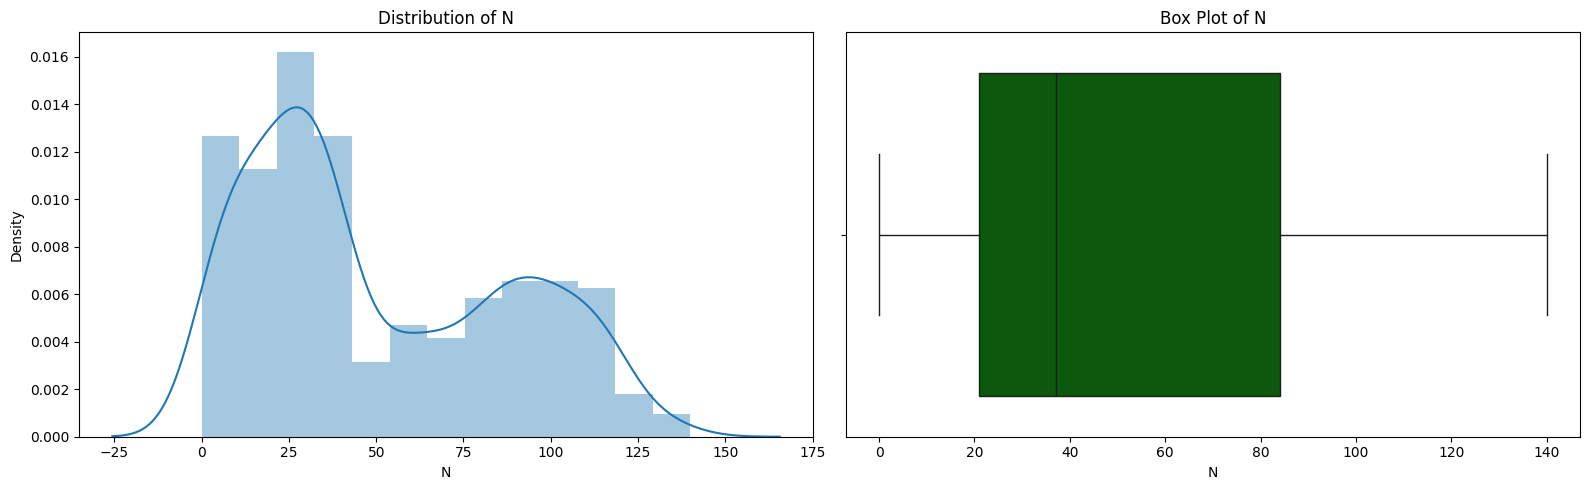

<ipython-input-19-663a9736309a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


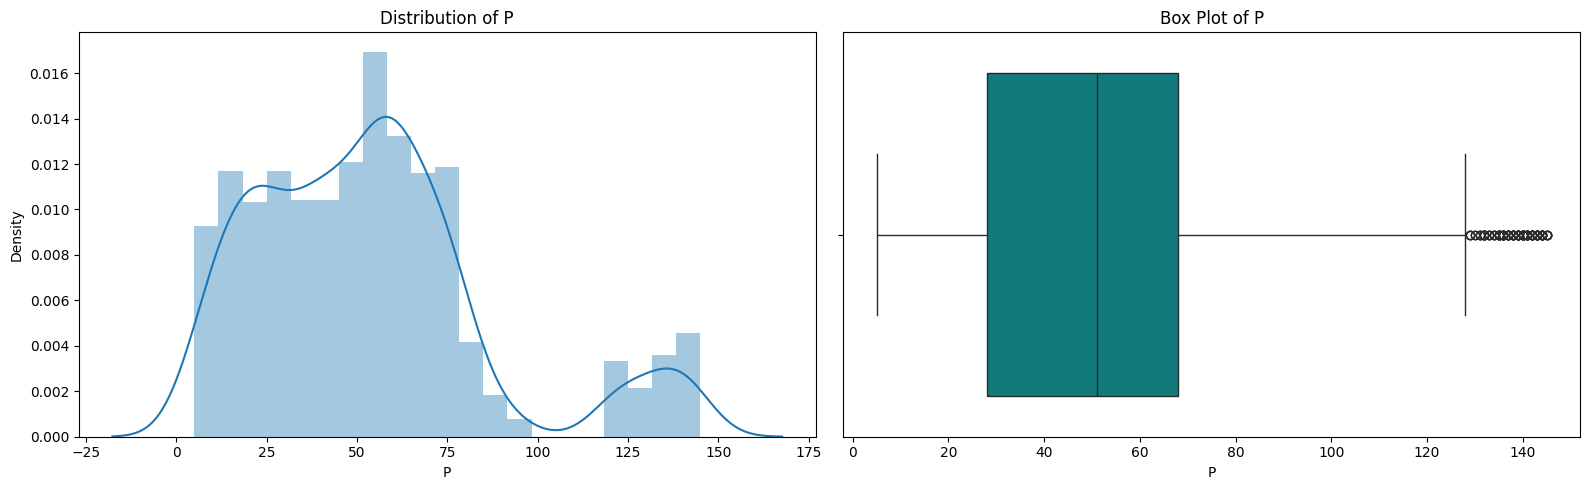

<ipython-input-19-663a9736309a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


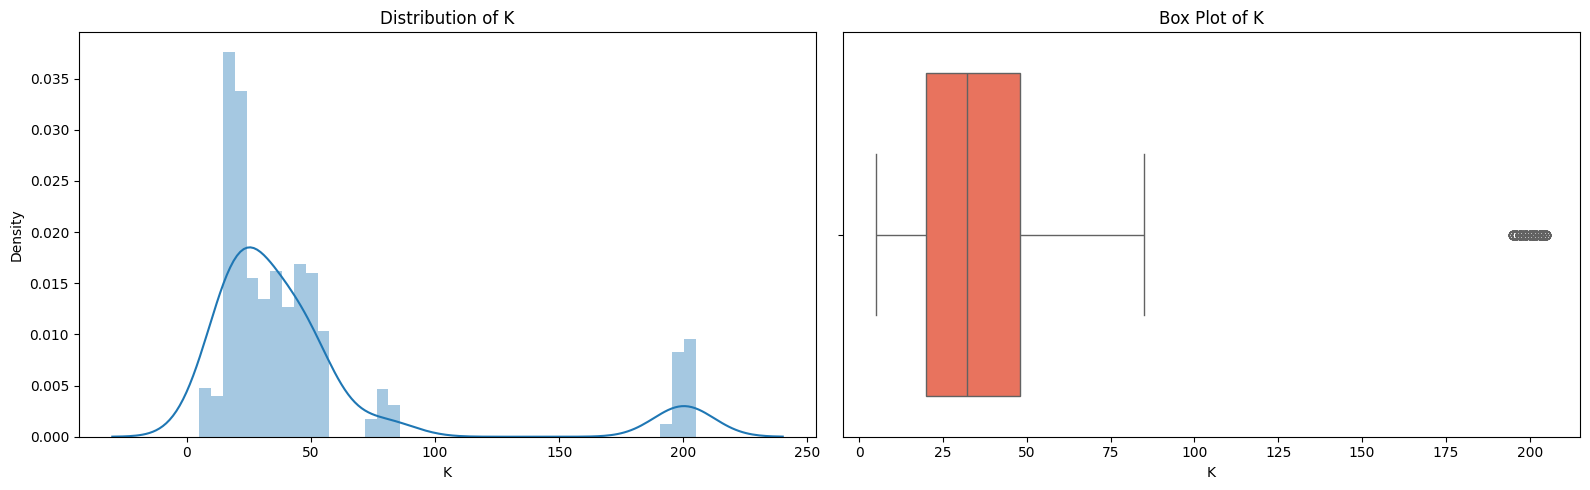

<ipython-input-19-663a9736309a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


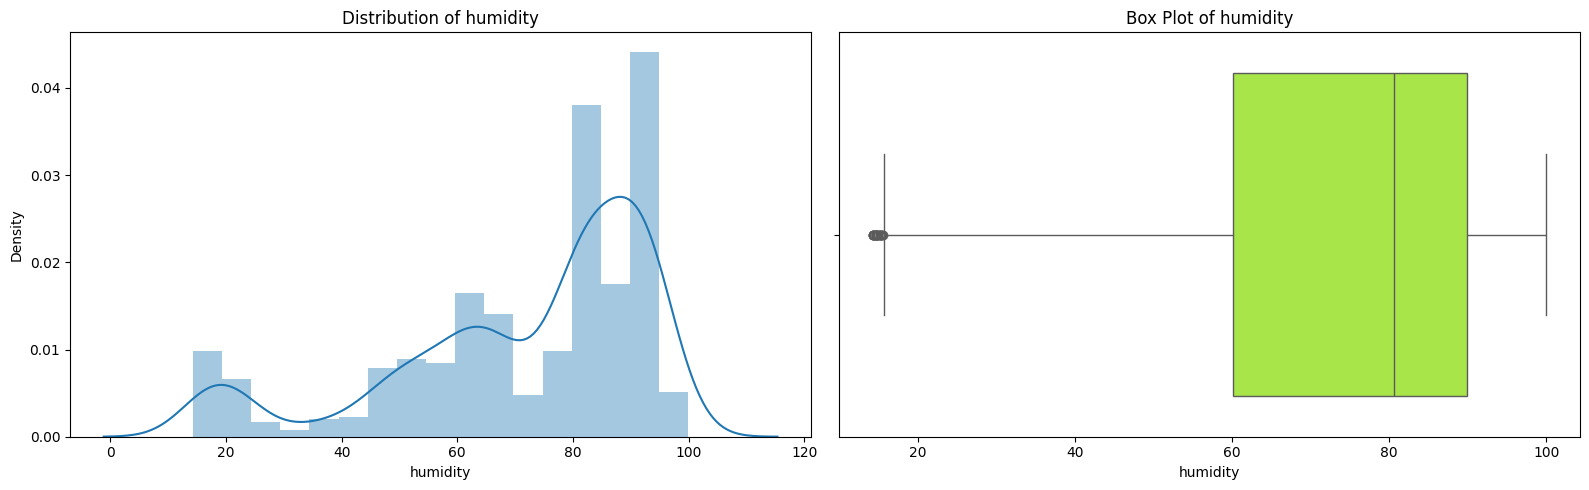

<ipython-input-19-663a9736309a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column], kde=True)


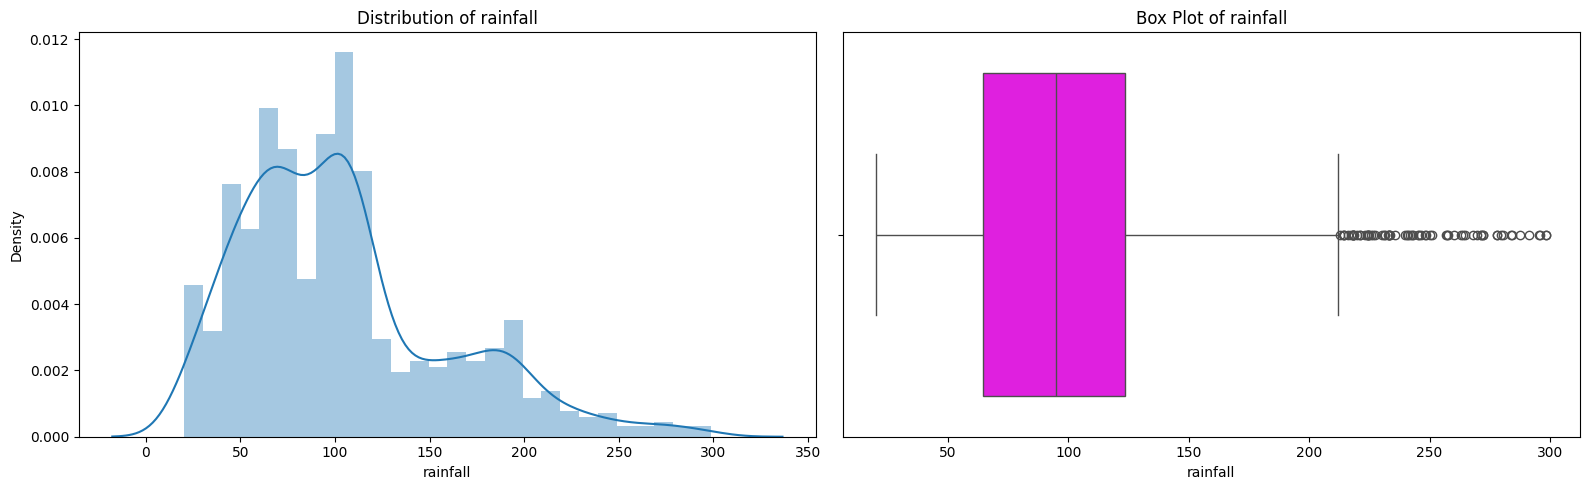

In [ ]:

for i,column in enumerate(X_train.columns.tolist()):
    if column=='ph' or column=='temperature':
        continue
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 2, 1)
    sns.distplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_train[column], color=colors[i])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()
    print("\n")



---

## 📈 `sns.distplot()` — Visualizing Feature Distributions

* `sns.distplot()` is used to **visualize the distribution** of a numerical feature.
* Combines a **histogram** and **Kernel Density Estimate (KDE)** into a single plot for deeper insight.
* Helps understand:

  * The **shape** of the data (normal, skewed, multimodal, etc.)
  * **Central tendency** and **spread**
  * The presence of **gaps**, **outliers**, or **spikes** in the feature
* Useful for **deciding preprocessing steps**, like:

  * Whether to apply **scaling or transformation**
  * How to **bin or discretize** features
  * Whether the feature is suitable for **modeling as-is**
* Helps **compare features visually** for different classes when combined with `hue` or faceting.




In [ ]:
from sklearn.preprocessing import KBinsDiscretizer


binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')


X_train_binned = binning.fit_transform(X_train[['K']])

X_val_binned = binning.transform(X_val[['K']])
X_test_binned = binning.transform(X_test[['K']])

Great! You're using **KMeans binning via `KBinsDiscretizer`** to transform a continuous feature (`K`) into discrete bins. Since the **distribution had gaps**, using **KMeans strategy** is a smart choice — it bins based on **data clusters** instead of equal-width or equal-frequency.

Here’s a clear explanation you can add as a **Colab markdown cell**:

---

## 🧩 Feature Engineering: KMeans Binning using `KBinsDiscretizer`

* I applied **KMeans-based binning** on the `K` feature (Potassium content) using `sklearn.preprocessing.KBinsDiscretizer`.
* The distribution of `K` had **irregular gaps and clusters**, making it unsuitable for basic binning strategies (like uniform or quantile).
* Used the following setup:

```python
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
```

---

### 🔹 What is KMeans Binning?

* Uses **KMeans clustering** to determine the bin boundaries.
* Groups similar values into clusters, then labels them as bins: `0`, `1`, `2`, etc.
* Each bin contains values **closer to its cluster center** than to others.

---

### 🔹 Why I used it:

* The displot of `K` showed **gaps and non-uniform spread** — `kmeans` helps group similar values despite such gaps.
* Helps preserve the **natural structure** in data better than uniform-width binning.
* Transforms a **continuous variable** into a **categorical feature**, which can be helpful for tree-based models or improving interpretability.

---

### 🔹 Applied Transformation:

```python
X_train_binned = binning.fit_transform(X_train[['K']])
X_val_binned = binning.transform(X_val[['K']])
X_test_binned = binning.transform(X_test[['K']])
```

✅ This helped make the `K` feature **more structured and cluster-aware** for modeling.

---

Let me know if you'd like to add a plot showing before/after binning or compare with `strategy='uniform'` or `'quantile'`.


In [ ]:
X_train['K_binned'] = X_train_binned
X_val['K_binned'] = X_val_binned
X_test['K_binned'] = X_test_binned

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall,K_binned
864,1,67,21,27.521354,60.536577,6.551578,48.064913,0.0
1090,117,82,45,25.293915,79.291222,5.614471,105.422025,0.0
304,2,61,20,22.139747,23.022511,5.955617,76.641283,0.0
391,40,78,20,19.185728,20.833983,5.669236,80.152934,0.0
1686,7,20,12,16.534604,94.767600,6.475275,110.044790,0.0
...,...,...,...,...,...,...,...,...
119,74,55,19,18.050337,62.893670,6.288868,84.236135,0.0
65,99,41,36,24.458021,82.748356,6.738652,182.561632,0.0
366,20,69,15,23.442607,22.772559,5.934136,107.413725,0.0
333,9,77,17,20.123733,24.452026,5.783425,106.158201,0.0




## ⚠️ Why Outlier Removal is Important for ANN

* **1. Prevents skewed learning:**
  Outliers can dominate the loss function (like MSE), forcing the model to focus too much on extreme values and ignoring general trends.

* **2. Stabilizes weight updates:**
  Large errors from outliers can cause **large gradients**, leading to unstable or divergent training.

* **3. Improves convergence speed:**
  With fewer extreme values, the model can learn more consistent patterns, reducing training time and helping it converge faster.

* **4. Reduces overfitting risk:**
  ANN may overfit rare or noisy outliers, hurting generalization on normal test data.

* **5. Improves model accuracy:**
  Clean data without extreme deviations often leads to better performance and more reliable predictions.

* **6. Enhances data normalization:**
  Outliers distort scaling (e.g., MinMax or StandardScaler), causing most data to collapse into a narrow range.

* **7. Better generalization to real-world inputs:**
  Outliers are often noise, measurement errors, or rare cases — ignoring them helps the model focus on realistic input-output relationships.

---



In [ ]:

upper_limit=X_train['ph'].mean() + 3*X_train['ph'].std()
lower_limit=X_train['ph'].mean() - 3*X_train['ph'].std()
X_train.loc[X_train['ph'] >upper_limit, 'ph'] = upper_limit
X_train.loc[X_train['ph'] <lower_limit, 'ph'] = lower_limit



The code you shared is applying the **Z-score method** for outlier detection, specifically under the assumption that the data follows a **normal (bell-shaped) distribution**.

---

## 📉 Z-Score Formula for Outlier Detection

The **Z-score** measures how many standard deviations a data point is from the mean:

$$
Z = \frac{X - \mu}{\sigma}
$$

Where:

* $X$ = data point
* $\mu$ = mean of the feature
* $\sigma$ = standard deviation of the feature

---

### 🔹 Outlier Detection Rule (Standard Threshold):

* If: $|Z| > 3$
  → The data point is considered an **outlier**
  (i.e., more than 3 standard deviations from the mean)




In [ ]:

upper_limit=X_train['temperature'].mean() + 3*X_train['temperature'].std()
lower_limit=X_train['temperature'].mean() - 3*X_train['temperature'].std()
X_train.loc[X_train['temperature'] >upper_limit, 'temperature'] = upper_limit
X_train.loc[X_train['temperature'] <lower_limit, 'temperature'] = lower_limit

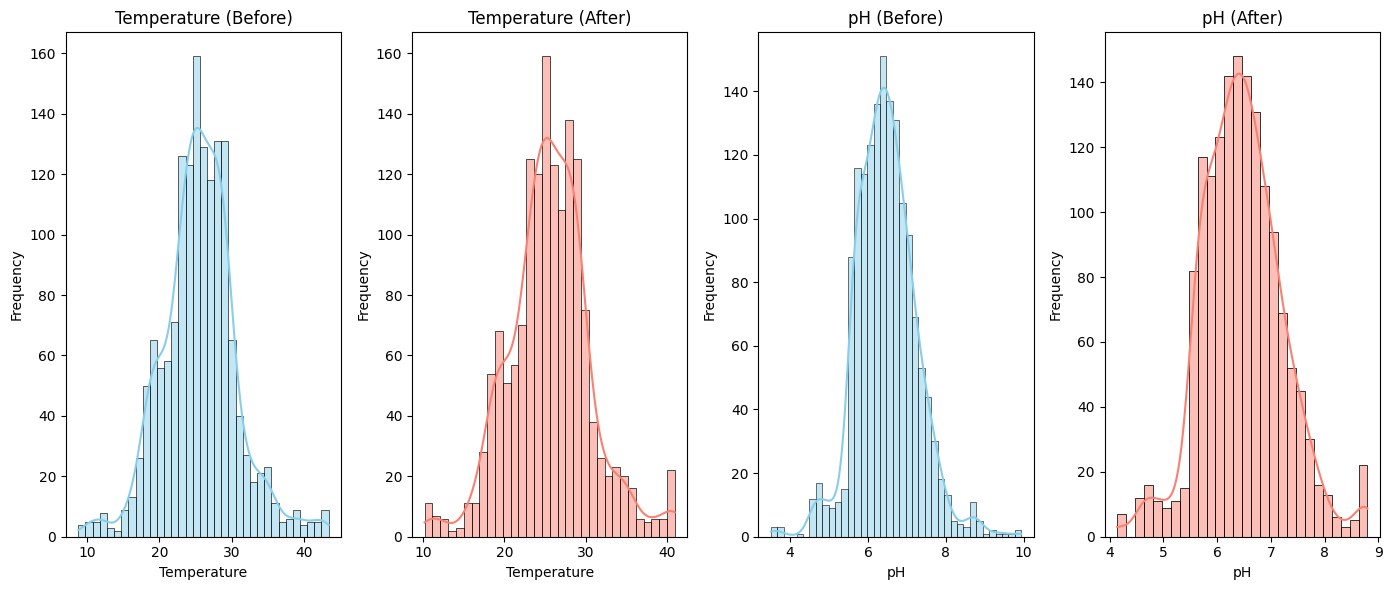

In [ ]:



plt.figure(figsize=(14, 6))


plt.subplot(1, 4, 1)
sns.histplot(X_train_copy['temperature'], kde=True, color='skyblue')
plt.title('Temperature (Before)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
sns.histplot(X_train['temperature'], kde=True, color='salmon')
plt.title('Temperature (After)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
sns.histplot(X_train_copy['ph'], kde=True, color='skyblue')
plt.title('pH (Before)')
plt.xlabel('pH')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
sns.histplot(X_train['ph'], kde=True, color='salmon')
plt.title('pH (After)')
plt.xlabel('pH')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [ ]:
tranformation_columns=['humidity','rainfall','N','P']


In [ ]:


from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
X_train[tranformation_columns] = pt.fit_transform(X_train[tranformation_columns])
X_val[tranformation_columns] = pt.transform(X_val[tranformation_columns])
X_test[tranformation_columns] = pt.transform(X_test[tranformation_columns])

print("Transformed X_train:")
print(X_train.head())





Transformed X_train:
             N         P   K  temperature  humidity        ph  rainfall  \
864  -2.037560  0.576523  21    27.521354 -0.739811  6.551578 -1.123274   
1090  1.492416  0.941272  45    25.293915  0.240708  5.614471  0.244023   
304  -1.891426  0.416314  20    22.139747 -1.843928  5.955617 -0.339338   
391  -0.043388  0.848394  20    19.185728 -1.875264  5.669236 -0.259773   
1686 -1.417553 -1.107727  12    16.534604  1.277194  6.475275  0.325643   

      K_binned  
864        0.0  
1090       0.0  
304        0.0  
391        0.0  
1686       0.0  


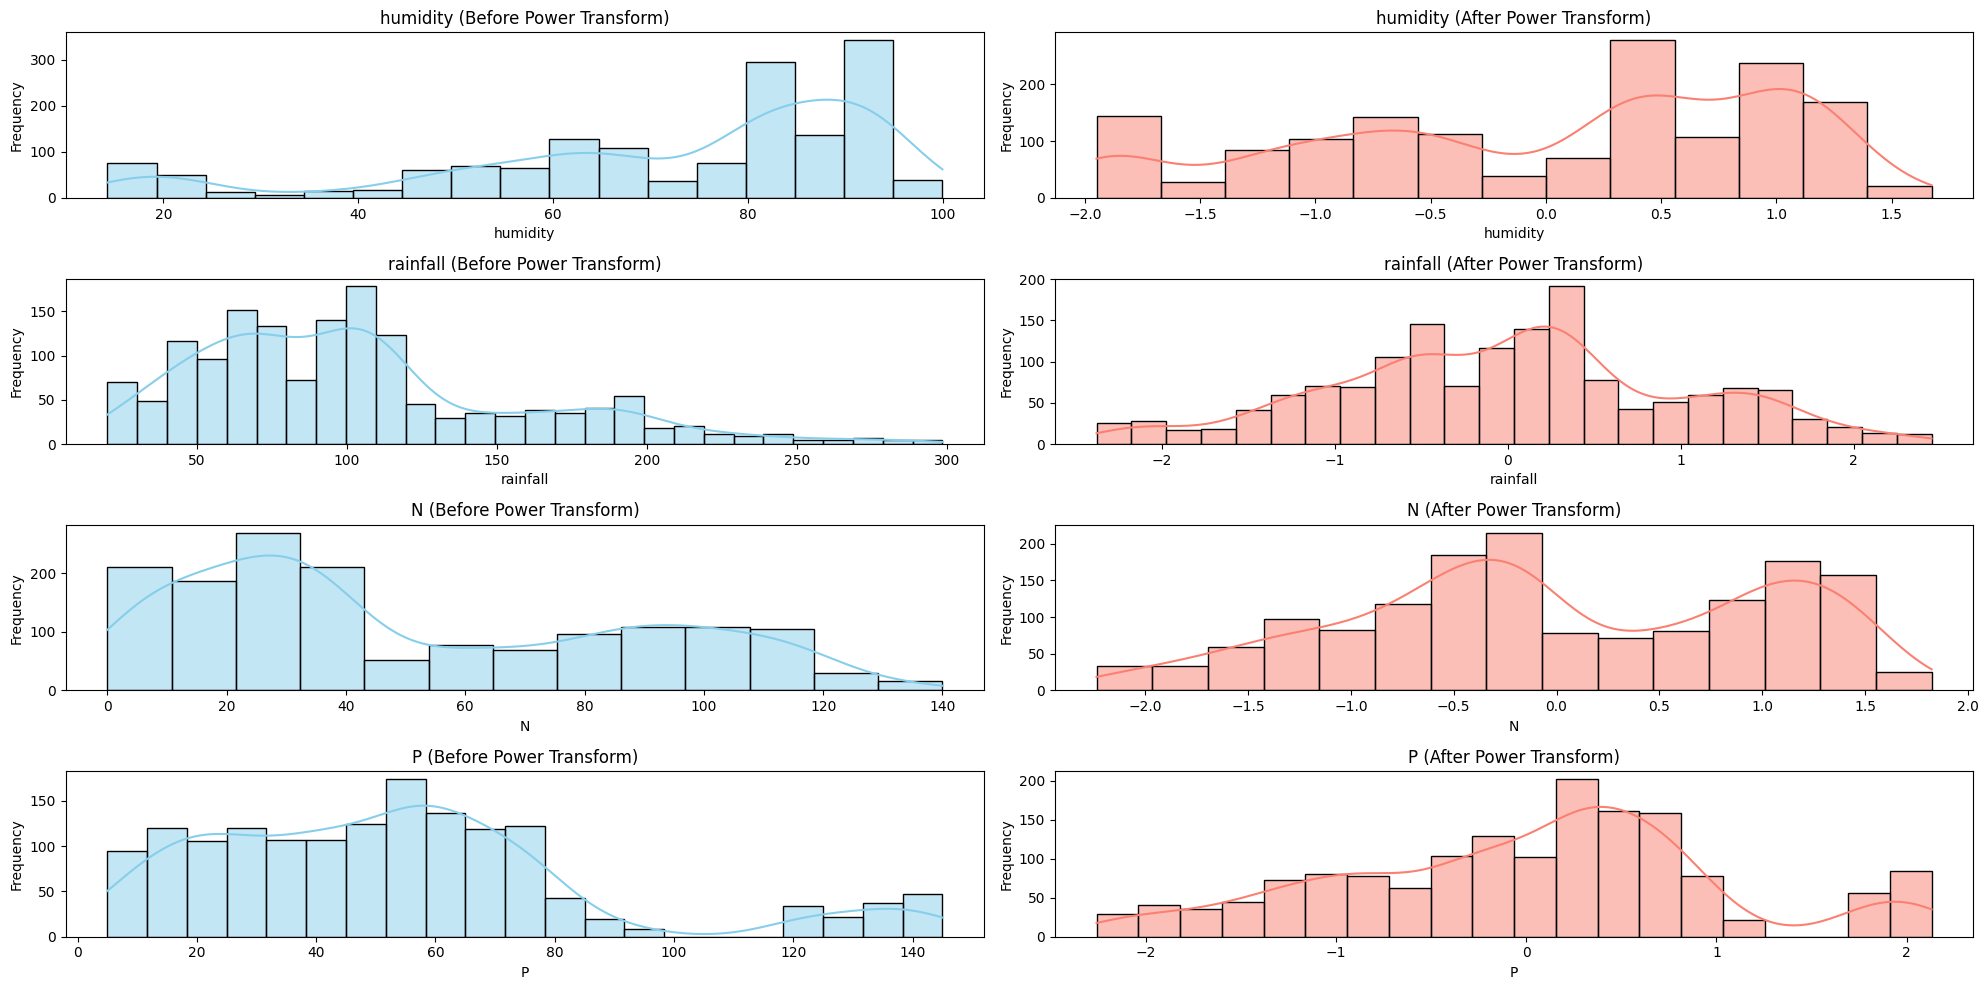

In [ ]:


plt.figure(figsize=(20, 10))

for i, col in enumerate(tranformation_columns):
    # Before transformation
    plt.subplot(len(tranformation_columns), 2, 2 * i + 1)
    sns.histplot(X_train_copy[col], kde=True, color='skyblue')
    plt.title(f'{col} (Before Power Transform)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # After transformation
    plt.subplot(len(tranformation_columns), 2, 2 * i + 2)
    sns.histplot(X_train[col], kde=True, color='salmon')
    plt.title(f'{col} (After Power Transform)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
Q1 = X_train['rainfall'].quantile(0.25)
Q3 = X_train['rainfall'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
X_train.loc[X_train['rainfall'] >upper_limit, 'rainfall'] = upper_limit


In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall,K_binned
864,-2.037560,0.576523,21,27.521354,-0.739811,6.551578,-1.123274,0.0
1090,1.492416,0.941272,45,25.293915,0.240708,5.614471,0.244023,0.0
304,-1.891426,0.416314,20,22.139747,-1.843928,5.955617,-0.339338,0.0
391,-0.043388,0.848394,20,19.185728,-1.875264,5.669236,-0.259773,0.0
1686,-1.417553,-1.107727,12,16.534604,1.277194,6.475275,0.325643,0.0
...,...,...,...,...,...,...,...,...
119,0.751047,0.245949,19,18.050337,-0.632824,6.288868,-0.170621,0.0
65,1.205386,-0.202614,36,24.458021,0.454164,6.738652,1.346823,0.0
366,-0.719790,0.627926,15,23.442607,-1.847681,5.934136,0.279527,0.0
333,-1.280085,0.824711,17,20.123733,-1.821599,5.783425,0.257207,0.0


In [ ]:


X_train = X_train.drop('K', axis=1)
X_val = X_val.drop('K', axis=1)
X_test = X_test.drop('K', axis=1)

print("X_train after dropping K:")
print(X_train.head())
print("\nX_val after dropping K:")
print(X_val.head())
print("\nX_test after dropping K:")
print(X_test.head())

X_train after dropping K:
             N         P  temperature  humidity        ph  rainfall  K_binned
864  -2.037560  0.576523    27.521354 -0.739811  6.551578 -1.123274       0.0
1090  1.492416  0.941272    25.293915  0.240708  5.614471  0.244023       0.0
304  -1.891426  0.416314    22.139747 -1.843928  5.955617 -0.339338       0.0
391  -0.043388  0.848394    19.185728 -1.875264  5.669236 -0.259773       0.0
1686 -1.417553 -1.107727    16.534604  1.277194  6.475275  0.325643       0.0

X_val after dropping K:
             N         P  temperature  humidity        ph  rainfall  K_binned
524  -0.487428  0.094905    27.317912 -1.101332  6.005243 -1.718090       0.0
1771  0.608269  0.602343    35.268248  1.103827  6.821775  0.935374       0.0
1153 -0.599346 -0.950750    32.821411 -1.250738  4.755274 -0.032310       0.0
1446  1.320342 -1.107727    29.730197  1.003490  6.342573 -2.359016       0.0
449  -0.159734  0.576523    35.951766 -1.572578  6.418063  0.740202       0.0

X_test after

In [ ]:
stand_sc=['temperature','ph']

In [ ]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train[stand_sc] = scaler.fit_transform(X_train[stand_sc])
X_val[stand_sc] = scaler.transform(X_val[stand_sc])
X_test[stand_sc] = scaler.transform(X_test[stand_sc])



print("X_train after Standard Scaling:")
print(X_train.head())
print("\nX_val after Standard Scaling:")
print(X_val.head())
print("\nX_test after Standard Scaling:")
print(X_test.head())


X_train after Standard Scaling:
             N         P  temperature  humidity        ph  rainfall  K_binned
864  -2.037560  0.576523     0.385166 -0.739811  0.110478 -1.123274       0.0
1090  1.492416  0.941272    -0.054429  0.240708 -1.129419  0.244023       0.0
304  -1.891426  0.416314    -0.676918 -1.843928 -0.678046 -0.339338       0.0
391  -0.043388  0.848394    -1.259907 -1.875264 -1.056959 -0.259773       0.0
1686 -1.417553 -1.107727    -1.783118  1.277194  0.009521  0.325643       0.0

X_val after Standard Scaling:
             N         P  temperature  humidity        ph  rainfall  K_binned
524  -0.487428  0.094905     0.345016 -1.101332 -0.612384 -1.718090       0.0
1771  0.608269  0.602343     1.914049  1.103827  0.467979  0.935374       0.0
1153 -0.599346 -0.950750     1.431155 -1.250738 -2.266235 -0.032310       0.0
1446  1.320342 -1.107727     0.821091  1.003490 -0.166059 -2.359016       0.0
449  -0.159734  0.576523     2.048945 -1.572578 -0.066177  0.740202       0.0



In [ ]:
X_train.shape[1]

7

In [ ]:
analysis_corr=pd.concat([X_train,y_train],axis=1)
analysis_corr


,N,P,temperature,humidity,ph,rainfall,K_binned,label
864,-2.037560,0.576523,0.385166,-0.739811,0.110478,-1.123274,0.0,10
1090,1.492416,0.941272,-0.054429,0.240708,-1.129419,0.244023,0.0,1
304,-1.891426,0.416314,-0.676918,-1.843928,-0.678046,-0.339338,0.0,9
391,-0.043388,0.848394,-1.259907,-1.875264,-1.056959,-0.259773,0.0,9
1686,-1.417553,-1.107727,-1.783118,1.277194,0.009521,0.325643,0.0,16
...,...,...,...,...,...,...,...,...
119,0.751047,0.245949,-1.483981,-0.632824,-0.237116,-0.170621,0.0,11
65,1.205386,-0.202614,-0.219396,0.454164,0.357999,1.346823,0.0,20
366,-0.719790,0.627926,-0.419793,-1.847681,-0.706466,0.279527,0.0,9
333,-1.280085,0.824711,-1.074787,-1.821599,-0.905874,0.257207,0.0,9


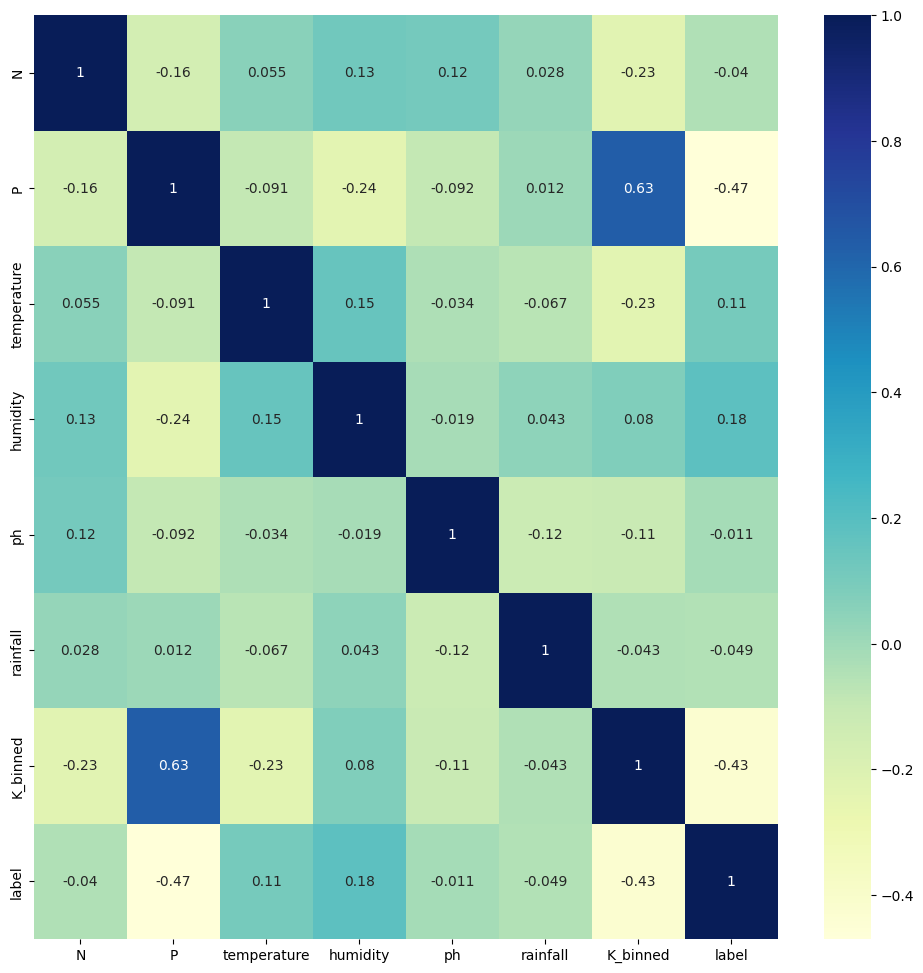

In [ ]:
corr = analysis_corr.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import ReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import LeakyReLU, PReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Activation,
    LeakyReLU, PReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


Absolutely! Here's a **clear explanation and math breakdown** of the key components used in your ANN code — especially:

* **L2 regularization**
* **Dropout**
* **ReLU activation function**

Formatted perfectly for a Colab **markdown text cell**:

---

## 🧮 Key Concepts in the Model Architecture

### 🔹 **1. L2 Regularization (Weight Decay)**

L2 regularization helps reduce overfitting by **penalizing large weight values** during training.

$$
\text{L2 Loss} = \lambda \sum_{j} w_j^2
$$

Where:

* $w_j$ = individual weights in the network
* $\lambda$ = regularization strength (in your code: `l2_reg=0.002`)

✅ This term is added to the total loss, encouraging the model to keep weights **small and smooth**, which improves generalization.

---

### 🔹 **2. Dropout**

Dropout randomly **disables a fraction of neurons** during training to prevent co-adaptation of neurons.

$$
\text{Dropout Rate} = p
$$

Where:

* $p$ = fraction of neurons to "drop" (set to zero) during each training step
* In your code: `dropout_rate` is a user-defined parameter (e.g., 0.3 means 30% of neurons dropped)

✅ Helps in **regularization** by introducing randomness and reducing dependency on specific nodes.

---

### 🔹 **3. ReLU Activation Function**

ReLU (**Rectified Linear Unit**) is a non-linear activation used to introduce non-linearity in the network:

$$
\text{ReLU}(x) = \max(0, x)
$$

* Outputs zero if the input is negative, else passes it through unchanged.
* Commonly used due to **simplicity** and efficient gradient flow.

#### Variants used in your code:

* `LeakyReLU(α=0.01)`:

  $$
  \text{LeakyReLU}(x) =
  \begin{cases}
    x, & \text{if } x > 0 \\
    \alpha x, & \text{if } x \leq 0
  \end{cases}
  $$

  Allows a small gradient ($\alpha$) when $x \leq 0$ to prevent dying neurons.

* `PReLU`: Parametric ReLU — similar to LeakyReLU, but **learns α** during training.





In [ ]:

import tensorflow as tf
import keras_tuner as kt



def build_model(hp):
    model = Sequential()


    num_layers = hp.Int('num_layers', min_value=1, max_value=5, step=1)

    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=16, max_value=128, step=1)
        l2_reg = hp.Float(f'l2_reg_{i}', min_value=0.0001, max_value=0.005, step=0.0005)

        if i == 0:
            model.add(Dense(units, input_dim=X_train.shape[1],
                            kernel_initializer=tf.keras.initializers.HeUniform(),
                            kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        else:
            model.add(Dense(units, kernel_initializer=tf.keras.initializers.HeUniform(),
                            kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))

        model.add(BatchNormalization())


        activation = hp.Choice(f'activation_{i}', ['relu', 'leakyrelu', 'prelu'])

        if activation == "prelu":
            model.add(PReLU())
        elif activation == "leakyrelu":
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Activation(activation))


        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.05)
        model.add(Dropout(dropout_rate))

    model.add(Dense(22, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', [0.001, 0.005, 0.01])
    )

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model




🔍 Understanding kt.RandomSearch (Keras Tuner)
kt.RandomSearch is a hyperparameter tuning strategy provided by Keras Tuner, used to find the best model configuration by randomly sampling from a defined search space.

🔹 What it does:
Randomly samples combinations of hyperparameters from a defined space (e.g., number of units, dropout rate, learning rate).

Evaluates a user-defined number of trials and selects the best-performing model based on a scoring metric (like accuracy or loss).

🔹 Why use RandomSearch?
Faster than grid search when the space is large.

Useful when you don’t know which hyperparameter combination works best.

Helps avoid manual trial-and-error in tuning complex models like ANN.



In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory="my_dir",
    project_name='crop'
)

tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val),callbacks=[early_stopping])


best_hp = tuner.get_best_hyperparameters()[0]
print(best_hp.values)

Trial 10 Complete [00h 00m 22s]
val_accuracy: 0.9848484992980957

Best val_accuracy So Far: 0.9878787994384766
Total elapsed time: 00h 05m 58s
{'num_layers': 1, 'units_0': 33, 'l2_reg_0': 0.0026, 'activation_0': 'relu', 'dropout_0': 0.35000000000000003, 'learning_rate': 0.01, 'units_1': 19, 'l2_reg_1': 0.0031, 'activation_1': 'relu', 'dropout_1': 0.45, 'units_2': 41, 'l2_reg_2': 0.0021, 'activation_2': 'prelu', 'dropout_2': 0.35000000000000003, 'units_3': 57, 'l2_reg_3': 0.0001, 'activation_3': 'relu', 'dropout_3': 0.45, 'units_4': 37, 'l2_reg_4': 0.0036, 'activation_4': 'prelu', 'dropout_4': 0.45}




---

## ⚙️ Weight Initialization Techniques in Deep Learning

Proper weight initialization improves **convergence speed** and **training stability**. Below are common techniques:

---

### 🔹 **1. He Uniform Initialization** (`HeUniform()`)

* Designed for **ReLU/LeakyReLU/PReLU** activations.
* Samples weights from a **uniform distribution**:

$$
W \sim \mathcal{U} \left( -\sqrt{\frac{6}{n_{\text{in}}}}, \sqrt{\frac{6}{n_{\text{in}}}} \right)
$$

Where:

* $n_{\text{in}}$ = number of input units to the neuron
* Maintains variance across layers for ReLU-type activations


---



In [ ]:
def create_model(layers, input_dim, dropout_rate, n_classes, activation="leakyrelu",
                learning_rate=0.01, l2_reg=0.002):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=input_dim,
                          kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        else:
            model.add(Dense(nodes, kernel_initializer=tf.keras.initializers.HeUniform(),
                          kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))

        model.add(BatchNormalization())


        if activation == "prelu":
            model.add(PReLU())
        elif activation == "leakyrelu":
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Activation(activation))

        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(n_classes, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [ ]:
best_model = create_model(
    layers=[best_hp.get(f'units_{i}') for i in range(best_hp.get('num_layers'))],
    input_dim=X_train.shape[1],
    dropout_rate=best_hp.get(f'dropout_0'),
    n_classes=22,
    activation=best_hp.get(f'activation_0'),
    learning_rate=best_hp.get('learning_rate'),
    l2_reg=best_hp.get(f'l2_reg_0')
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=best_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
               validation_data=(X_val, y_val), callbacks=[early_stopping],
               )

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2452 - loss: 2.7579 - val_accuracy: 0.8727 - val_loss: 0.9524
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6540 - loss: 1.1743 - val_accuracy: 0.8909 - val_loss: 0.5782
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7118 - loss: 0.9105 - val_accuracy: 0.9000 - val_loss: 0.4659
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7707 - loss: 0.7169 - val_accuracy: 0.9212 - val_loss: 0.3890
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7821 - loss: 0.6730 - val_accuracy: 0.9121 - val_loss: 0.3566
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7791 - loss: 0.6230 - val_accuracy: 0.9152 - val_loss: 0.3229
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8053 - loss: 0.5554 - val_accuracy: 0.9242 - val_loss: 0.2980
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7850 - loss: 0.6168 - val_accuracy: 0.9515 - 

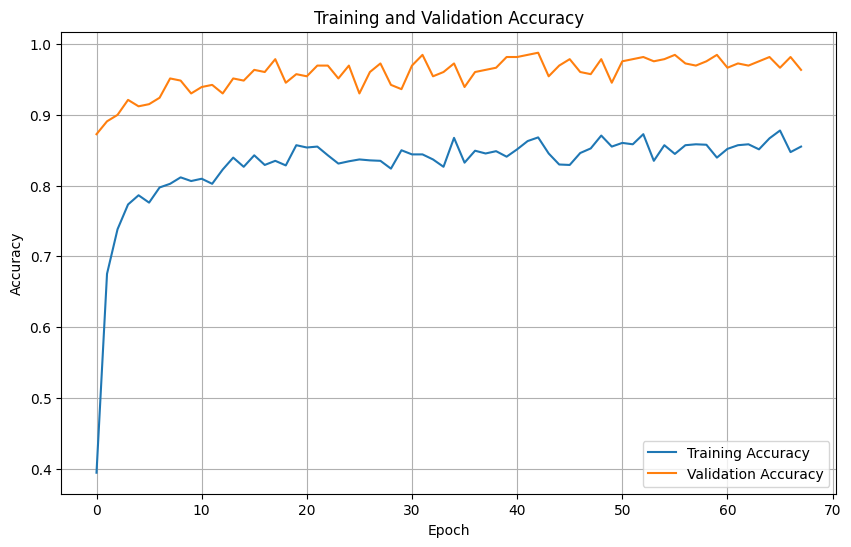

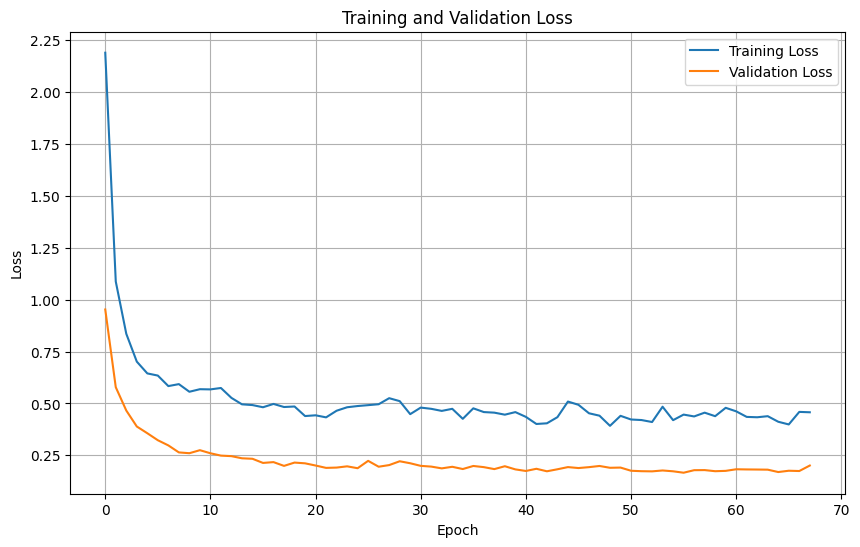

In [ ]:
# %%
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9424


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


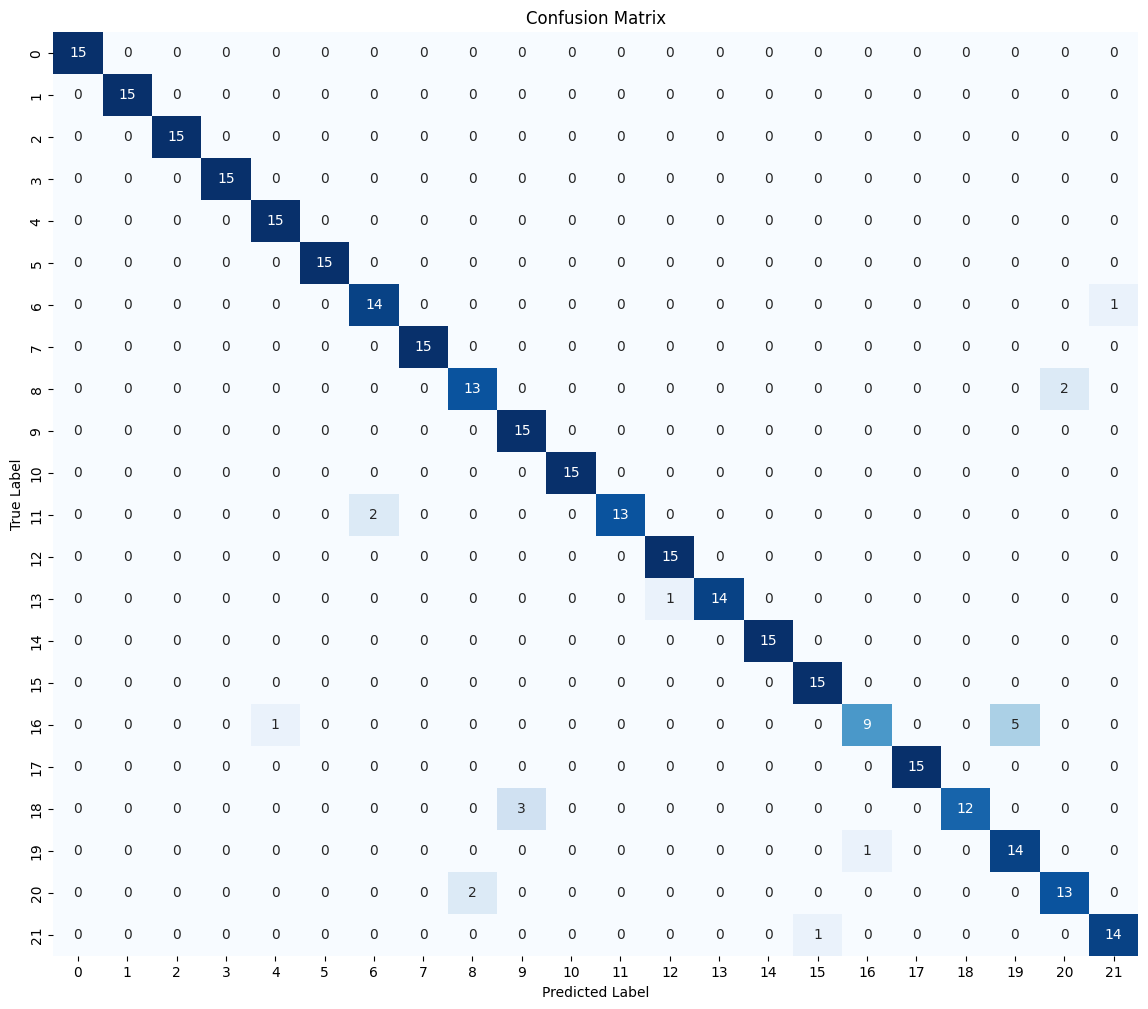

In [ ]:
from sklearn.metrics import confusion_matrix


y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report


y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


print(classification_report(y_test, y_pred, target_names=le.classes_))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        15
     coconut       0.94      1.00      0.97        15
      coffee       1.00      1.00      1.00        15
      cotton       0.88      0.93      0.90        15
      grapes       1.00      1.00      1.00        15
        jute       0.87      0.87      0.87        15
 kidneybeans       0.83      1.00      0.91        15
      lentil       1.00      1.00      1.00        15
       maize       1.00      0.87      0.93        15
       mango       0.94      1.00      0.97        15
   mothbeans       1.00      0.93      0.97        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       0.94      1.00      0.97        15
      orange       0.90      0.60      0.

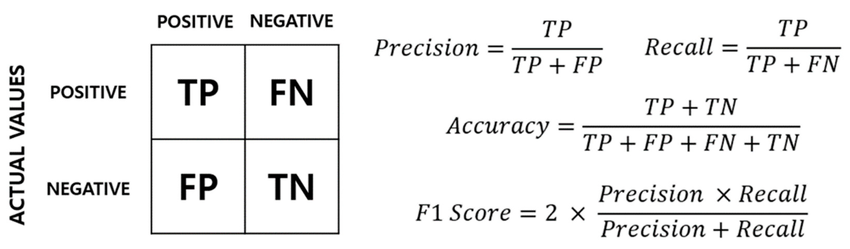